# karar ağaçları

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings

In [18]:
filterwarnings("ignore")

In [26]:
df=pd.read_csv("/content/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [34]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])
cart_model=DecisionTreeRegressor(max_leaf_nodes=10)
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

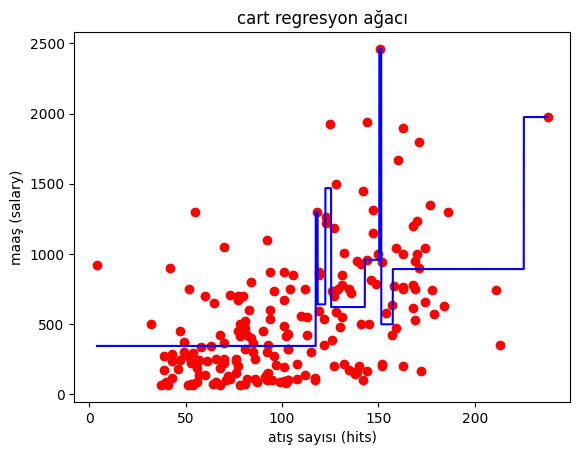

In [35]:
X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X_train,y_train, color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color="blue")
plt.title("cart regresyon ağacı")
plt.xlabel("atış sayısı (hits)")
plt.ylabel("maaş (salary)");

In [36]:
#tek değişkenli tahmin
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [37]:
#çok değişkenli tahmin
df=pd.read_csv("/content/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [43]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)

In [44]:
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

448.0153862223931

# model tuning

In [50]:
cart_params={"max_depth":[2,3,4,5,10,20],
             "min_samples_split":[2,10,5,30,50,10]}

In [47]:
#cart_model=DecisionTreeRegressor()

In [52]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [53]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [56]:
cart_tuned=DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)

In [57]:
y_pred=cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434